In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [283]:
#read training data and explore
df=pd.read_csv('Dx_train.csv')
print(df.head(5))
df.describe()
df.head()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   
2            7      147             76              0        0  39.4   
3            2      100             66             20       90  32.9   
4            4      129             86             20      270  35.1   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  
2                     0.257   43  
3                     0.867   28  
4                     0.231   23  


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [339]:
#reading test data
dft=pd.read_csv('D_Xtest.csv')
dft=dft.values
dft.shape[0]

192

<AxesSubplot:>

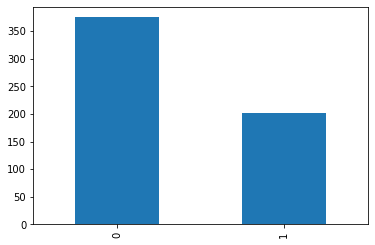

In [323]:
dfy=pd.read_csv('Dy_train.csv ')
dfy.head()
# graph explaing classes  of patient of diabetes
dfy['Outcome'].value_counts().plot(kind='bar')

In [331]:
y=dfy.values
x=df.values
#x[x.isnull()==True]=0

x

array([[  7.   , 168.   ,  88.   , ...,  38.2  ,   0.787,  40.   ],
       [  8.   , 110.   ,  76.   , ...,  27.8  ,   0.237,  58.   ],
       [  7.   , 147.   ,  76.   , ...,  39.4  ,   0.257,  43.   ],
       ...,
       [  2.   , 122.   ,  60.   , ...,  29.8  ,   0.717,  22.   ],
       [  4.   , 154.   ,  72.   , ...,  31.3  ,   0.338,  37.   ],
       [  1.   ,  88.   ,  78.   , ...,  32.   ,   0.365,  29.   ]])

In [295]:
def dist(u,v):
    u=np.array(u).astype(np.float)  #changing data type for dist calculation
    v=np.array(v).astype(np.float)
    return np.sqrt((sum((u-v)**2)))

In [296]:
def knn(x,y,query,k=3):
    val=[]
    for i in range(x.shape[0]):
        d=dist(x[i],query)
        val.append((d,y[i]))
    val=sorted(val)
    
    val=np.array(val)
    val=val[:5]
    #new_val=val[:,1]
    new_val,counts=np.unique(val[:,1],return_counts=True)
    #idx = new_val[counts.argmax()][0]
    
    #idx = new_val[counts.argmax()][0]
    return int(new_val[counts.argmax()])

In [347]:
#saving prediction in csv file
file='dbts.csv'
with open(file,'w',encoding='utf-8') as f:
    f.write('Outcome')
    f.write('\n')
    for i in range(dft.shape[0]):
        p=knn(x,y,dft[i])
        s=''
        s+=str(p)
        f.write(s)
        f.write('\n')

<ipython-input-296-3e514f84d3d2>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  val=np.array(val)
